In [124]:
pip install --upgrade --no-deps statsmodels

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic

In [126]:
#Uploading the dataset Tweets_final_Comp__Ver_3_en.xlsx
data_final = pd.read_excel("Tweets_final_Comp__Ver_3_en.xlsx", index_col=0)


In [127]:
data_final

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
2020-01-01,NaN,NaN,13.180176,1.087719,False,0.179340,0.033702,0.887912,0.078404,0.073860,0.069825,0.106404,0.143772,0.500614,0.244551,-0.112602,0.099546,-0.106242,0.120404,0.052914
2020-01-02,3.458250e+09,3257.850098,13.180176,0.517699,False,0.144800,0.033018,0.898058,0.068947,0.084735,0.040221,0.145708,0.118717,0.521681,0.154011,-0.060918,-0.090559,0.065854,0.002512,0.110361
2020-01-03,3.461290e+09,3234.850098,8.489990,2.324074,False,0.141044,0.043333,0.874701,0.081963,0.086759,0.040123,0.142994,0.114012,0.535401,0.144167,-0.051296,-0.091187,0.053970,-0.019624,0.147773
2020-01-04,3.532217e+09,3238.660075,15.236654,1.191176,False,0.080401,0.035265,0.906654,0.058059,0.072647,0.050515,0.148897,0.107574,0.510000,-0.014792,-0.118365,-0.024457,0.079817,-0.049920,0.078508
2020-01-05,3.603143e+09,3242.470052,21.983317,1.130000,False,0.069955,0.031640,0.915560,0.052790,0.055400,0.068400,0.130400,0.134500,0.451000,-0.042175,-0.200333,0.090398,-0.001173,0.076777,-0.082375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26,3.754360e+09,3478.729980,28.760010,0.942675,False,0.107898,0.033958,0.902510,0.063531,0.087325,0.056093,0.139703,0.128025,0.467367,0.057282,-0.048608,0.011368,0.039560,0.046312,-0.037744
2020-08-27,3.929560e+09,3484.550049,-0.589844,0.388430,False,0.131149,0.030585,0.897006,0.072419,0.102087,0.043905,0.120744,0.117975,0.457996,0.118228,0.021550,-0.066903,-0.043453,-0.000977,-0.063299
2020-08-28,3.855880e+09,3508.010010,13.320068,1.184915,False,0.146512,0.024861,0.914470,0.060676,0.090049,0.060462,0.138370,0.126034,0.445718,0.158501,-0.035662,0.039424,0.033724,0.036942,-0.096779
2020-08-29,3.855880e+09,3508.010010,13.320068,1.086066,False,0.147967,0.022967,0.915857,0.061193,0.083934,0.045328,0.161721,0.137049,0.444713,0.162314,-0.064721,-0.057765,0.135969,0.088772,-0.099519


In [128]:
data_final["Daily_change_stock"].fillna(data_final["Daily_change_stock"].mean(), inplace=True)

In [129]:
data_final.describe()

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
count,2.420000e+02,242.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,5.157750e+09,3070.689542,1.800532,0.856496,0.091385,0.036876,0.901854,0.061270,0.090157,0.054818,0.130535,0.117845,0.491250,0.013999,-0.035145,0.003179,-0.000580,-0.001590,0.027380
std,1.469477e+09,278.778850,40.029210,1.399964,0.041455,0.008721,0.011866,0.007812,0.039336,0.012584,0.020004,0.019997,0.055521,0.108664,0.186947,0.080810,0.087588,0.094092,0.151396
min,3.193400e+09,2237.399902,-150.220215,0.217105,-0.059951,0.016076,0.874168,0.040871,0.042409,0.019748,0.070383,0.049849,0.321028,-0.382691,-0.262075,-0.222033,-0.263959,-0.321532,-0.436787
25%,3.905792e+09,2879.157471,-15.363403,0.425998,0.069963,0.031074,0.894168,0.055598,0.076019,0.046500,0.117241,0.104073,0.450931,-0.042153,-0.102339,-0.050240,-0.058788,-0.066393,-0.082562
50%,4.804417e+09,3130.065063,5.400024,0.617568,0.093682,0.035561,0.901408,0.061193,0.085455,0.054061,0.129880,0.117456,0.489965,0.020020,-0.057496,-0.001686,-0.003448,-0.003422,0.023875
75%,5.942367e+09,3282.496582,19.015055,0.882164,0.116458,0.041291,0.909937,0.066121,0.096202,0.060864,0.142857,0.131349,0.528317,0.079722,-0.006420,0.042001,0.053372,0.061952,0.128454
max,9.044690e+09,3508.010010,141.030029,20.692790,0.203175,0.067986,0.942312,0.094712,0.486361,0.111261,0.183753,0.174324,0.657413,0.307028,1.847844,0.365641,0.232435,0.264162,0.480480


In [130]:
data_final_granger = pd.DataFrame() 

In [131]:
data_final_granger

""


In [132]:
data_final_granger["Daily_change_stock"] = data_final["Daily_change_stock"]
data_final_granger["compound"] = data_final["Compound_scaled"]
data_final_granger["Happy"] = data_final["Happy_scaled"]
data_final_granger["Angry"] = data_final["Angry_scaled"]
data_final_granger["Surprise"] = data_final["Surprise_scaled"]
data_final_granger["Sad"] = data_final["Sad_scaled"]
data_final_granger["Fear"] = data_final["Fear_scaled"]


In [133]:
from sklearn.preprocessing import StandardScaler
x_1 = data_final_granger[['Daily_change_stock']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

data_final_granger['Daily_change_stock_scaled'] = scaled_data

data_final_granger.tail()
len(data_final_granger)

243

In [134]:
#Standarzing the values for analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final_granger[data_final_granger.columns] = scaler.fit_transform(data_final_granger[data_final_granger.columns])

In [135]:
data_final_granger

,Daily_change_stock,compound,Happy,Angry,Surprise,Sad,Fear,Daily_change_stock_scaled
2020-01-01,0.284870,2.126076,-0.415180,1.194981,-1.208840,1.299214,0.169007,0.284870
2020-01-02,0.284870,1.291146,-0.138148,-1.162377,0.760045,0.043688,0.549241,0.284870
2020-01-03,0.167459,1.200369,-0.086569,-1.170163,0.624085,-0.192055,0.796863,0.167459
2020-01-04,0.336351,-0.265503,-0.446070,-0.342692,0.919797,-0.514708,0.338409,0.336351
2020-01-05,0.505242,-0.518019,-0.885431,1.081541,-0.006780,0.834592,-0.726451,0.505242
...,...,...,...,...,...,...,...,...
2020-08-26,0.674885,0.399143,-0.072161,0.101549,0.459225,0.510151,-0.431046,0.674885
2020-08-27,-0.059839,0.961170,0.303893,-0.869037,-0.490489,0.006526,-0.600186,-0.059839
2020-08-28,0.288372,1.332550,-0.002772,0.449449,0.392455,0.410360,-0.821787,0.288372
2020-08-29,0.288372,1.367716,-0.158530,-0.755728,1.562205,0.962333,-0.839920,0.288372


In [136]:
data_final_granger.describe()

,Daily_change_stock,compound,Happy,Angry,Surprise,Sad,Fear,Daily_change_stock_scaled
count,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02
mean,5.528271e-17,-2.832668e-17,-2.832668e-17,-1.827528e-18,1.096517e-17,-3.655055e-18,-1.781839e-17,5.482583e-17
std,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00
min,-3.805584e+00,-3.658148e+00,-1.216377e+00,-2.792693e+00,-3.013219e+00,-3.407326e+00,-3.072244e+00,-3.805584e+00
25%,-4.296703e-01,-5.178171e-01,-3.601695e-01,-6.624096e-01,-6.659408e-01,-6.901354e-01,-7.276877e-01,-4.296703e-01
50%,9.010724e-02,5.552454e-02,-1.198055e-01,-6.032706e-02,-3.281605e-02,-1.951587e-02,-2.319906e-02,9.010724e-02
75%,4.309367e-01,6.060772e-01,1.539702e-01,4.814064e-01,6.172466e-01,6.767114e-01,6.689946e-01,4.309367e-01
max,3.485376e+00,2.702215e+00,1.009310e+01,4.494648e+00,2.665835e+00,2.830211e+00,2.998992e+00,3.485376e+00


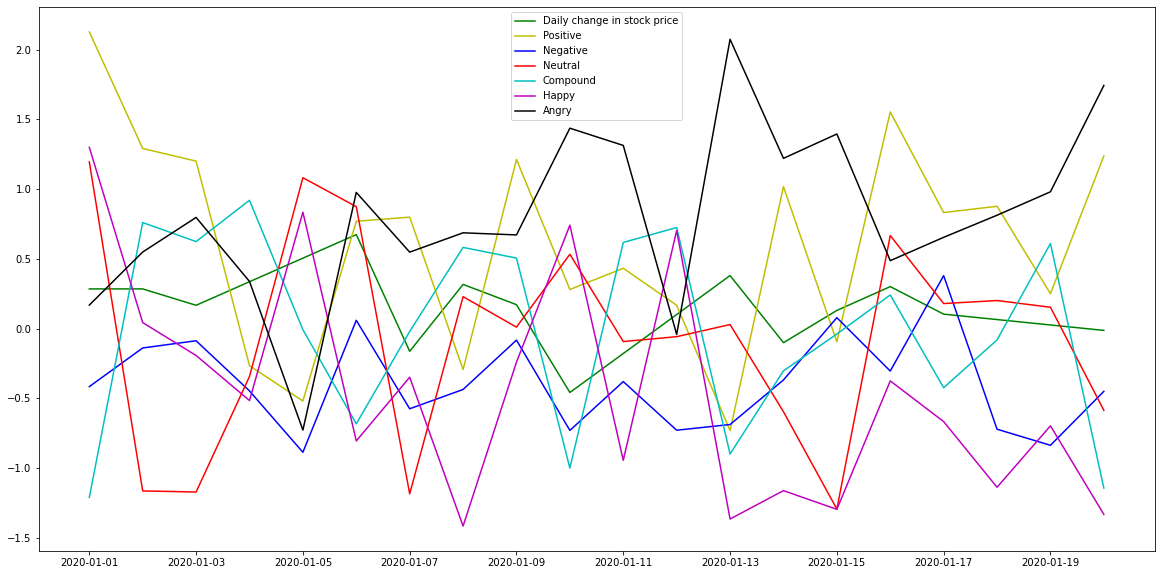

In [137]:
plt.figure(figsize=(20,10))
plt.plot(data_final_granger["Daily_change_stock"].iloc[:20],color="#008000")
plt.plot(data_final_granger["compound"].iloc[:20],color="y")
plt.plot(data_final_granger["Happy"].iloc[:20],color="b")
plt.plot(data_final_granger["Angry"].iloc[:20],color="r")
plt.plot(data_final_granger["Surprise"].iloc[:20],color="c")
plt.plot(data_final_granger["Sad"].iloc[:20],color="m")
plt.plot(data_final_granger["Fear"].iloc[:20],color="k")
plt.legend(["Daily change in stock price", "Positive","Negative","Neutral","Compound","Happy","Angry","Surprise","Sad"," Fear"])
plt.savefig("GraphOne.png")

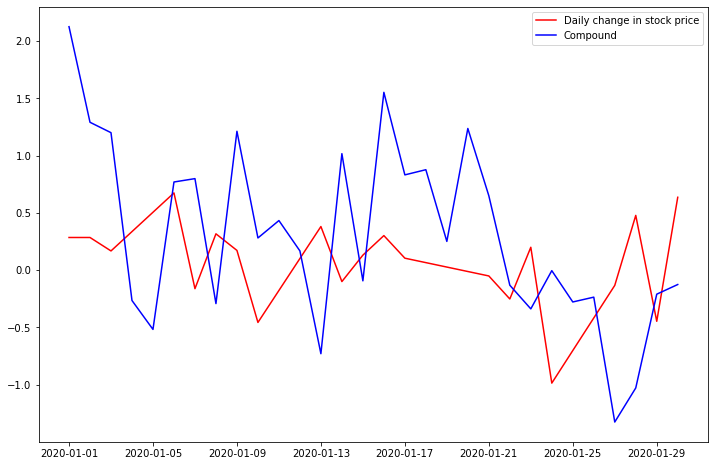

In [138]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["compound"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Compound"])
plt.savefig("Comp_Stock.png")

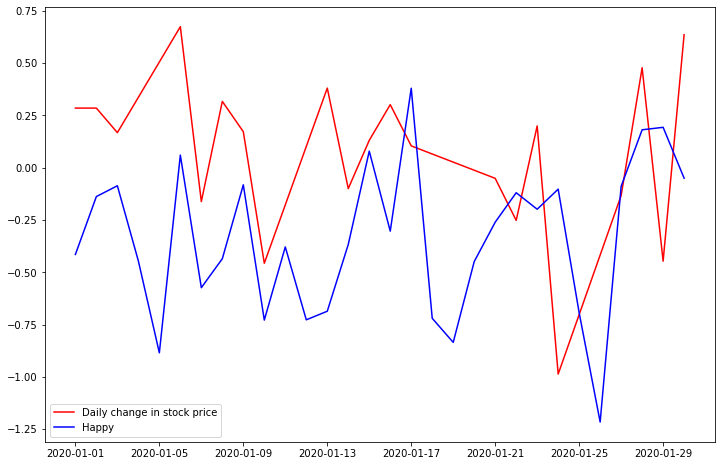

In [139]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["Happy"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Happy"])
plt.savefig("Happy_Stock.png")

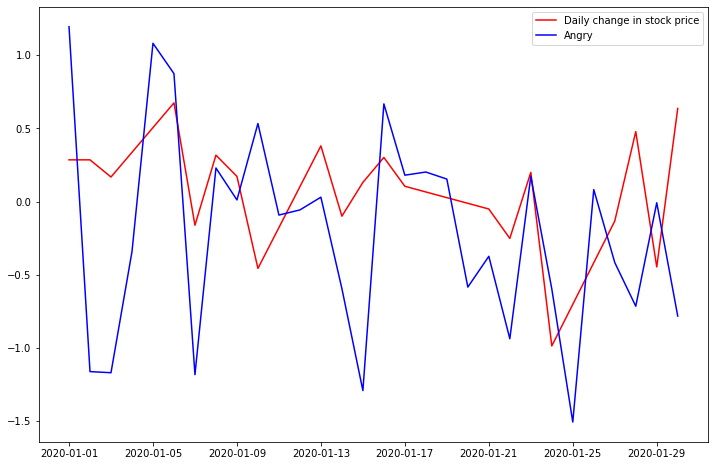

In [140]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["Angry"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Angry"])
plt.savefig("Angry_Stock.png")

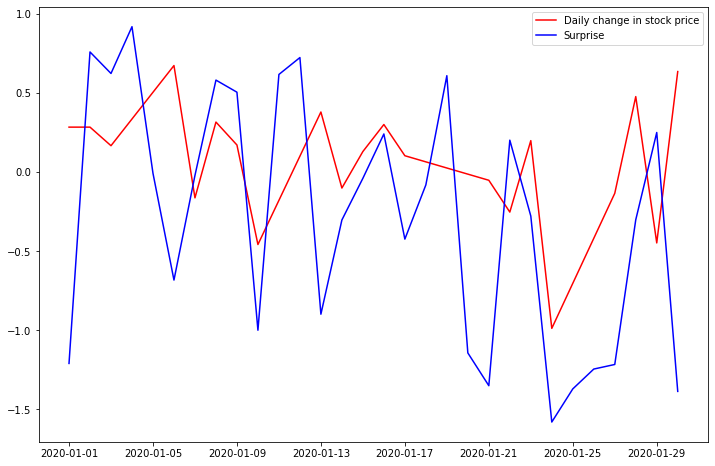

In [141]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["Surprise"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Surprise"])
plt.savefig("Surprise_Stock.png")

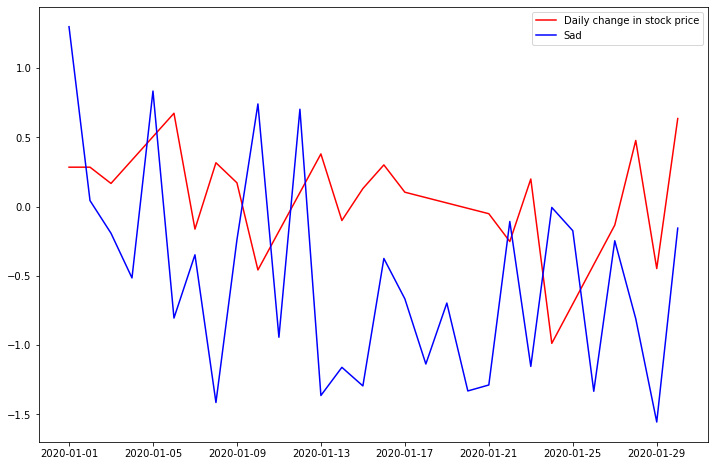

In [142]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["Sad"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Sad"])
plt.savefig("Sad_Stock.png")

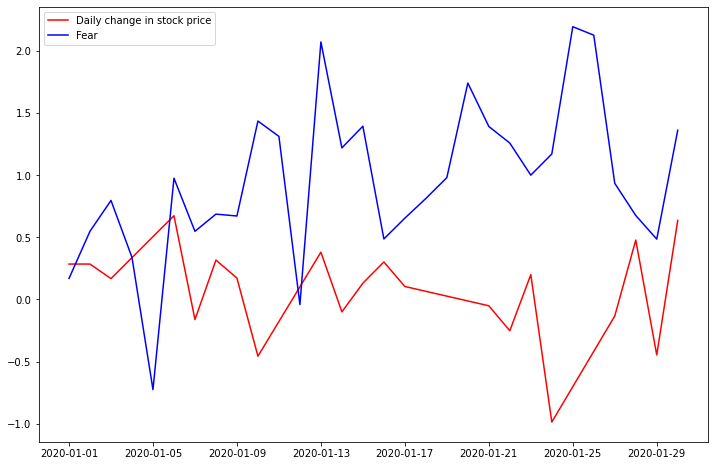

In [143]:
plt.figure(figsize=(12,8))
plt.plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="r")
plt.plot(data_final_granger["Fear"].iloc[:30],color="b")
plt.legend(["Daily change in stock price", "Fear"])
plt.savefig("Fear_Stock.png")

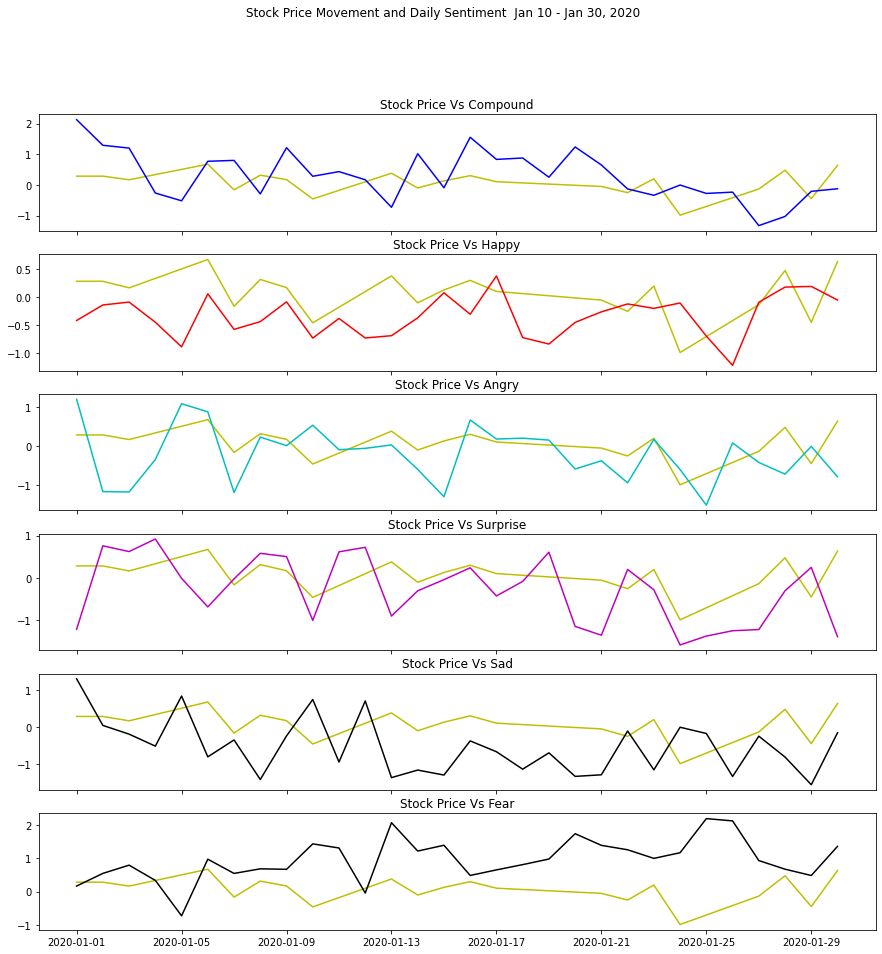

In [144]:
fig, axs = plt.subplots(6,sharex=True,figsize=(15,15))
fig.suptitle('Stock Price Movement and Daily Sentiment  Jan 10 - Jan 30, 2020')
axs[0].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[0].plot(data_final_granger["compound"].iloc[:30],color="b")
axs[1].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[1].plot(data_final_granger["Happy"].iloc[:30],color="r")
axs[2].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[2].plot(data_final_granger["Angry"].iloc[:30],color="c")
axs[3].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[3].plot(data_final_granger["Surprise"].iloc[:30],color="m")
axs[4].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[4].plot(data_final_granger["Sad"].iloc[:30],color="k")
axs[5].plot(data_final_granger["Daily_change_stock_scaled"].iloc[:30],color="y")
axs[5].plot(data_final_granger["Fear"].iloc[:30],color="k")
axs[0].set_title('Stock Price Vs Compound')
axs[1].set_title('Stock Price Vs Happy')
axs[2].set_title('Stock Price Vs Angry')
axs[3].set_title('Stock Price Vs Surprise')
axs[4].set_title('Stock Price Vs Sad')
axs[5].set_title('Stock Price Vs Fear')
fig.savefig('full_figure.png')

In [145]:
data_final_granger.drop("Daily_change_stock", axis=1,inplace=True)

In [146]:
#Checking for null values
data_final_granger.isnull().sum()

compound                     0
Happy                        0
Angry                        0
Surprise                     0
Sad                          0
Fear                         0
Daily_change_stock_scaled    0
dtype: int64

In [147]:
data_final_granger.columns

Index(['compound', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear',
       'Daily_change_stock_scaled'],
      dtype='object')

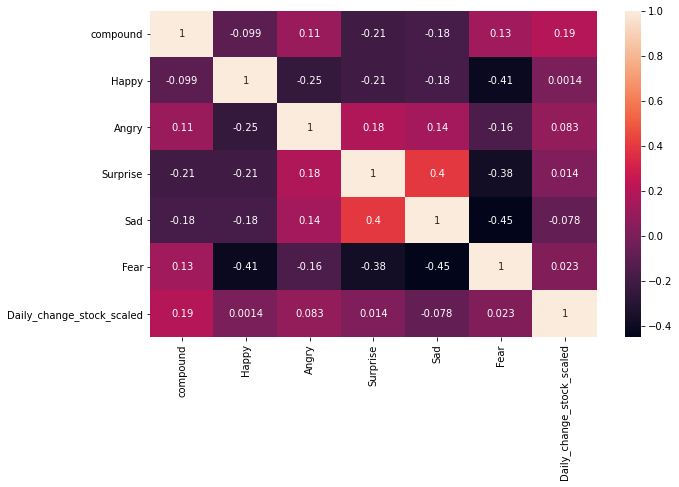

In [148]:
#Looking at correlation
import seaborn as sns
corr = data_final_granger.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
heat_map= plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [149]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data_final_granger, variables = data_final_granger.columns)    

,compound_x,Happy_x,Angry_x,Surprise_x,Sad_x,Fear_x,Daily_change_stock_scaled_x
compound_y,1.0000,0.5685,0.1682,0.0104,0.0304,0.2630,0.0000
Happy_y,0.5455,1.0000,0.0929,0.5586,0.6908,0.1885,0.3501
Angry_y,0.1895,0.0865,1.0000,0.0908,0.0000,0.0040,0.0283
Surprise_y,0.0035,0.2236,0.0196,1.0000,0.0000,0.0391,0.0213
Sad_y,0.0001,0.0577,0.1716,0.0070,1.0000,0.0000,0.7333
Fear_y,0.1670,0.0008,0.3717,0.1901,0.0301,1.0000,0.0707
Daily_change_stock_scaled_y,0.0926,0.0706,0.0356,0.0396,0.1826,0.4830,1.0000


In [150]:
#Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*40)
    for col, trace, cvt in zip(data_final_granger.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data_final_granger)

Name   ::  Test Stat > C(95%)    =>   Signif  
 --------------------------------------------------------------------------------
compound ::  215.15    > 111.7797  =>   True
Happy  ::  147.57    > 83.9383   =>   True
Angry  ::  97.04     > 60.0627   =>   True
Surprise ::  63.58     > 40.1749   =>   True
Sad    ::  35.88     > 24.2761   =>   True
Fear   ::  11.96     > 12.3212   =>   False
Daily_change_stock_scaled ::  2.24      > 4.1296    =>   False


In [151]:
#Training and Testing the data
nobs=50
df_train, df_test =data_final_granger[0:-nobs], data_final_granger[-nobs:]

In [152]:
print(df_train.shape)
print(df_test.shape)

(193, 7)
(50, 7)


In [153]:
#Checking for Stationarity

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [154]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "compound" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7756
 No. Lags Chosen       = 6
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.3926. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Happy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6847
 No. Lags Chosen       = 2
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Angry" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [155]:
#First Order differencing for stationarity
df_differenced = df_train.diff().dropna()

In [156]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "compound" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9568
 No. Lags Chosen       = 5
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Happy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.4006
 No. Lags Chosen       = 1
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Angry" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

In [157]:
df_differenced

,compound,Happy,Angry,Surprise,Sad,Fear,Daily_change_stock_scaled
2020-01-02,-0.834930,0.277032,-2.357358,1.968885,-1.255525,0.380234,0.000000
2020-01-03,-0.090777,0.051579,-0.007787,-0.135960,-0.235743,0.247622,-0.117411
2020-01-04,-1.465872,-0.359502,0.827471,0.295712,-0.322653,-0.458454,0.168891
2020-01-05,-0.252515,-0.439361,1.424233,-0.926577,1.349300,-1.064860,0.168891
2020-01-06,1.287612,0.945432,-0.207450,-0.675102,-1.638872,1.702573,0.168891
...,...,...,...,...,...,...,...
2020-07-07,-0.869004,1.044953,0.539348,-0.096661,-0.928512,-0.029519,-1.140263
2020-07-08,0.648591,-0.881941,-0.885079,0.846436,1.139758,0.185455,0.951009
2020-07-09,-0.202990,0.062122,1.034814,0.486940,-0.523343,-0.789330,-1.026109
2020-07-10,-0.140951,0.218722,-0.321471,-1.247056,0.441305,0.246305,1.419137


In [158]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -0.28121154415040805
BIC :  0.6723345918213788
FPE :  0.7551277977428175
HQIC:  0.10501899972354767 

Lag Order = 2
AIC :  -1.17400012202395
BIC :  0.6204079178542137
FPE :  0.30984123947439735
HQIC:  -0.4471115682202367 

Lag Order = 3
AIC :  -1.2023426671666082
BIC :  1.439080826585693
FPE :  0.30272755106241145
HQIC:  -0.13223847924522225 

Lag Order = 4
AIC :  -1.2050631815648076
BIC :  2.289605533618595
FPE :  0.304926172086542
HQIC:  0.21084508814901604 

Lag Order = 5
AIC :  -1.0235356379336835
BIC :  3.330685599752712
FPE :  0.3717702358137087
HQIC:  0.7407964852473277 

Lag Order = 6
AIC :  -1.0851524112829911
BIC :  4.1350075284356835
FPE :  0.35859203192605926
HQIC:  1.0302551715342405 

Lag Order = 7
AIC :  -1.0663809323121303
BIC :  5.026184142160375
FPE :  0.3790869934173888
HQIC:  1.4027860715074958 

Lag Order = 8
AIC :  -0.9967041538722174
BIC :  5.974814146595095
FPE :  0.4276749877072864
HQIC:  1.8289391186573347 

Lag Order = 9
AIC :  -0.7334532

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [159]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,0.9722,1.096,2.644,1.023
1,-0.1836,0.8098,0.8326,0.2192
2,-1.079,0.7834*,0.3408,-0.3240*
3,-1.112*,1.620,0.3319*,-0.003947
4,-1.082,2.519,0.3457,0.3781
5,-0.9100,3.560,0.4182,0.9025
6,-1.005,4.335,0.3911,1.160
7,-1.000,5.208,0.4085,1.517
8,-0.9403,6.137,0.4573,1.929
9,-0.6990,7.248,0.6239,2.523


In [160]:

model_fitted = model.fit(2)
model_fitted.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     00:57:39
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   0.620408
Nobs:                     190.000    HQIC:                 -0.447112
Log likelihood:          -1670.66    FPE:                   0.309841
AIC:                     -1.17400    Det(Omega_mle):        0.182028
--------------------------------------------------------------------
Results for equation compound
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                                0.000507         0.061868            0.008           0.993
L1.compound                         -0.572186         0.075187           -7.610           0.0

In [161]:
#Durbin Watson test for serial correlation
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data_final_granger.columns, out):
    print(col, ':', round(val, 2))

compound : 2.15
Happy : 2.03
Angry : 2.14
Surprise : 2.17
Sad : 2.13
Fear : 2.01
Daily_change_stock_scaled : 2.09


In [163]:
lag_order = model_fitted.k_ar
print(lag_order)


2


In [164]:
# Input data for forecasting
input_data = df_differenced.values[-lag_order:]
print(input_data)
# forecasting
pred = model_fitted.forecast(y=input_data, steps=nobs)
pred = (pd.DataFrame(pred, index=df_test.index, columns=df_test.columns + '_pred'))
#print(pred)
pred

[[-0.14095089  0.21872182 -0.32147131 -1.24705615  0.44130458  0.24630488
   1.41913739]
 [ 1.7190433   0.1366362  -1.02555743  0.01922769  1.04574124  0.6453699
  -0.68783363]]


,compound_pred,Happy_pred,Angry_pred,Surprise_pred,Sad_pred,Fear_pred,Daily_change_stock_scaled_pred
2020-07-12,-0.674226,-0.257974,1.148770,0.524671,-0.765154,-0.310359,-0.671179
2020-07-13,-0.410510,0.028192,-0.347324,0.139097,-0.052019,-0.158185,0.964531
2020-07-14,0.351889,0.171831,-0.323669,-0.477722,0.241163,0.151368,-0.188370
2020-07-15,0.123606,-0.091316,0.376199,0.119196,-0.003538,0.003958,-0.394482
2020-07-16,-0.212410,-0.078266,-0.062144,0.195788,-0.068953,-0.053238,0.273266
2020-07-17,0.013750,0.100256,-0.095143,-0.120007,-0.015486,-0.024507,0.045386
2020-07-18,0.096188,0.006016,0.065992,-0.054744,0.067117,0.016647,-0.131909
2020-07-19,-0.037490,-0.064076,0.026098,0.066264,-0.007923,0.007439,0.027309
2020-07-20,-0.023879,0.027466,-0.017734,0.011629,-0.024483,-0.034413,0.032764
2020-07-21,0.020994,0.027406,-0.000229,-0.038377,0.020234,-0.007522,-0.015745


In [165]:
# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_pred'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_pred'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_pred'].cumsum()
    return df_fc

output = invert_transformation(df_train, pred,second_diff=False)


In [166]:
output

,compound_pred,Happy_pred,Angry_pred,Surprise_pred,Sad_pred,Fear_pred,Daily_change_stock_scaled_pred,compound_forecast,Happy_forecast,Angry_forecast,Surprise_forecast,Sad_forecast,Fear_forecast,Daily_change_stock_scaled_forecast
2020-07-12,-0.674226,-0.257974,1.148770,0.524671,-0.765154,-0.310359,-0.671179,1.596883,-0.153140,0.912288,0.315697,0.715561,-0.736549,-0.588749
2020-07-13,-0.410510,0.028192,-0.347324,0.139097,-0.052019,-0.158185,0.964531,1.186373,-0.124948,0.564964,0.454795,0.663542,-0.894734,0.375782
2020-07-14,0.351889,0.171831,-0.323669,-0.477722,0.241163,0.151368,-0.188370,1.538262,0.046883,0.241295,-0.022928,0.904706,-0.743366,0.187412
2020-07-15,0.123606,-0.091316,0.376199,0.119196,-0.003538,0.003958,-0.394482,1.661867,-0.044432,0.617494,0.096269,0.901167,-0.739408,-0.207070
2020-07-16,-0.212410,-0.078266,-0.062144,0.195788,-0.068953,-0.053238,0.273266,1.449457,-0.122698,0.555350,0.292057,0.832214,-0.792646,0.066196
2020-07-17,0.013750,0.100256,-0.095143,-0.120007,-0.015486,-0.024507,0.045386,1.463207,-0.022442,0.460207,0.172050,0.816728,-0.817153,0.111582
2020-07-18,0.096188,0.006016,0.065992,-0.054744,0.067117,0.016647,-0.131909,1.559395,-0.016426,0.526199,0.117306,0.883845,-0.800506,-0.020326
2020-07-19,-0.037490,-0.064076,0.026098,0.066264,-0.007923,0.007439,0.027309,1.521905,-0.080502,0.552297,0.183570,0.875922,-0.793066,0.006983
2020-07-20,-0.023879,0.027466,-0.017734,0.011629,-0.024483,-0.034413,0.032764,1.498026,-0.053036,0.534563,0.195199,0.851439,-0.827480,0.039747
2020-07-21,0.020994,0.027406,-0.000229,-0.038377,0.020234,-0.007522,-0.015745,1.519020,-0.025631,0.534334,0.156821,0.871674,-0.835002,0.024002


In [167]:
#combining predicted and real data set
combine = pd.concat([output['Daily_change_stock_scaled_forecast'], df_test['Daily_change_stock_scaled']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.Daily_change_stock_scaled_forecast /row.Daily_change_stock_scaled *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)


In [168]:
combine

,Daily_change_stock_scaled_forecast,Daily_change_stock_scaled,accuracy
2020-07-12,-0.59,-0.61,97.25%
2020-07-13,0.38,-1.29,-29.06%
2020-07-14,0.19,1.37,13.71%
2020-07-15,-0.21,-0.03,677.76%
2020-07-16,0.07,0.14,48.88%
2020-07-17,0.11,-0.03,-348.09%
2020-07-18,-0.02,0.19,-10.50%
2020-07-19,0.01,0.42,1.67%
2020-07-20,0.04,0.64,6.17%
2020-07-21,0.02,-0.33,-7.36%


In [169]:
output


,compound_pred,Happy_pred,Angry_pred,Surprise_pred,Sad_pred,Fear_pred,Daily_change_stock_scaled_pred,compound_forecast,Happy_forecast,Angry_forecast,Surprise_forecast,Sad_forecast,Fear_forecast,Daily_change_stock_scaled_forecast
2020-07-12,-0.674226,-0.257974,1.148770,0.524671,-0.765154,-0.310359,-0.671179,1.596883,-0.153140,0.912288,0.315697,0.715561,-0.736549,-0.588749
2020-07-13,-0.410510,0.028192,-0.347324,0.139097,-0.052019,-0.158185,0.964531,1.186373,-0.124948,0.564964,0.454795,0.663542,-0.894734,0.375782
2020-07-14,0.351889,0.171831,-0.323669,-0.477722,0.241163,0.151368,-0.188370,1.538262,0.046883,0.241295,-0.022928,0.904706,-0.743366,0.187412
2020-07-15,0.123606,-0.091316,0.376199,0.119196,-0.003538,0.003958,-0.394482,1.661867,-0.044432,0.617494,0.096269,0.901167,-0.739408,-0.207070
2020-07-16,-0.212410,-0.078266,-0.062144,0.195788,-0.068953,-0.053238,0.273266,1.449457,-0.122698,0.555350,0.292057,0.832214,-0.792646,0.066196
2020-07-17,0.013750,0.100256,-0.095143,-0.120007,-0.015486,-0.024507,0.045386,1.463207,-0.022442,0.460207,0.172050,0.816728,-0.817153,0.111582
2020-07-18,0.096188,0.006016,0.065992,-0.054744,0.067117,0.016647,-0.131909,1.559395,-0.016426,0.526199,0.117306,0.883845,-0.800506,-0.020326
2020-07-19,-0.037490,-0.064076,0.026098,0.066264,-0.007923,0.007439,0.027309,1.521905,-0.080502,0.552297,0.183570,0.875922,-0.793066,0.006983
2020-07-20,-0.023879,0.027466,-0.017734,0.011629,-0.024483,-0.034413,0.032764,1.498026,-0.053036,0.534563,0.195199,0.851439,-0.827480,0.039747
2020-07-21,0.020994,0.027406,-0.000229,-0.038377,0.020234,-0.007522,-0.015745,1.519020,-0.025631,0.534334,0.156821,0.871674,-0.835002,0.024002


In [170]:
output.loc[:, ["Daily_change_stock_scaled_forecast", 'compound_forecast', 'Happy_forecast', 'Surprise_forecast',
       'Sad_forecast', 'Fear_forecast']]

,Daily_change_stock_scaled_forecast,compound_forecast,Happy_forecast,Surprise_forecast,Sad_forecast,Fear_forecast
2020-07-12,-0.588749,1.596883,-0.153140,0.315697,0.715561,-0.736549
2020-07-13,0.375782,1.186373,-0.124948,0.454795,0.663542,-0.894734
2020-07-14,0.187412,1.538262,0.046883,-0.022928,0.904706,-0.743366
2020-07-15,-0.207070,1.661867,-0.044432,0.096269,0.901167,-0.739408
2020-07-16,0.066196,1.449457,-0.122698,0.292057,0.832214,-0.792646
2020-07-17,0.111582,1.463207,-0.022442,0.172050,0.816728,-0.817153
2020-07-18,-0.020326,1.559395,-0.016426,0.117306,0.883845,-0.800506
2020-07-19,0.006983,1.521905,-0.080502,0.183570,0.875922,-0.793066
2020-07-20,0.039747,1.498026,-0.053036,0.195199,0.851439,-0.827480
2020-07-21,0.024002,1.519020,-0.025631,0.156821,0.871674,-0.835002


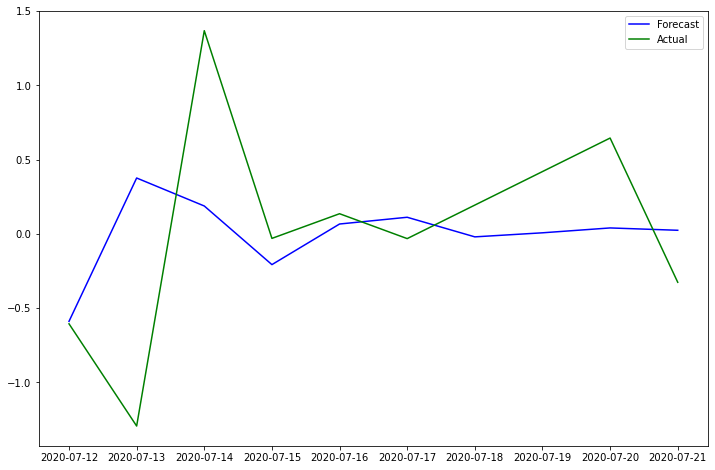

In [171]:
plt.figure(figsize=(12,8))
plt.plot(output["Daily_change_stock_scaled_forecast"].iloc[:10],color="b")
plt.plot(df_test["Daily_change_stock_scaled"].iloc[:10],color="g")

plt.legend(["Forecast", "Actual"])
plt.savefig("Graph_forecast.png")

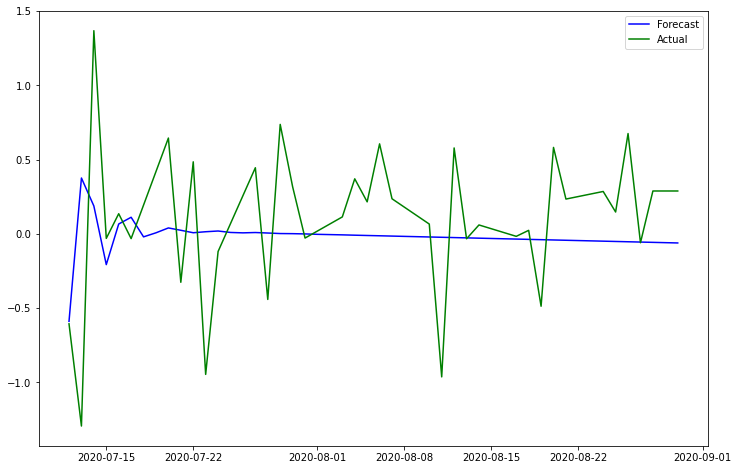

In [172]:
plt.figure(figsize=(12,8))
plt.plot(output["Daily_change_stock_scaled_forecast"],color="b")
plt.plot(df_test["Daily_change_stock_scaled"],color="g")

plt.legend(["Forecast", "Actual"])
plt.savefig("Graph_forecast_full.png")

In [173]:
#Error Testing
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


In [174]:
print('Forecast Accuracy of: Stock Price')
forecast_errors = [output['Daily_change_stock_scaled_forecast'][i]- df_test['Daily_change_stock_scaled'][i] for i in range(len(df_test['Daily_change_stock_scaled']))]
bias = sum(forecast_errors) * 1.0/len(df_test['Daily_change_stock_scaled'])
print('Bias: %f' % bias)
accuracy_prod = forecast_accuracy(output['Daily_change_stock_scaled_forecast'].values, df_test['Daily_change_stock_scaled'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Stock Price
Bias: -0.131765
mape :  1.2989
me :  -0.1318
mae :  0.3378
mpe :  -1.024
rmse :  0.471
corr :  0.0353
minmax :  2.1544
